# What is sqlite3?

`sqlite3` is a **built-in Python module** that allows you to work with **SQLite** databases directly from Python. SQLite is a lightweight, serverless database that stores everything in a single file. The `sqlite3` module helps you **create databases**, **run SQL queries**, and **manipulate data**—all using Python.

---

## Step 1: Importing sqlite3 in Jupyter Notebook

To start using SQLite in a Jupyter Notebook, the first thing you need to do is import the `sqlite3` library, which is already included with Python.

In [47]:
import sqlite3

## Step 2: Connecting to a Database

Next, you need to connect to a database. If the database doesn't exist, **SQLite** will automatically create one for you. You can connect to the database by using the `connect()` function.

Once you're connected, you'll create a **cursor object**. A cursor is like a control structure that allows you to interact with the database—think of it as your tool for executing SQL commands.

In [3]:
# Connect to the SQLite database (or create the file if it doesn't exist)
# 'mydatabase.db' is the file where the database will be stored
connection = sqlite3.connect('mydatabase.db')

# Create a cursor object that lets us execute SQL commands and interact with the database
cursor = connection.cursor()

## Step 3: Creating a Table

Now that we have connected to our database in the previous step, it’s time to **create a table** to store our data. Think of a table in a database like a **spreadsheet**: it has rows (each row represents a single record) and columns (each column holds a specific type of information).

In this example, we’ll be creating a **Products** table to store details about different products in a store.

### **Objective**:
We want to create a table called `Products` with the following columns:
- `ProductID`: A unique number that identifies each product. This number will increase automatically every time a new product is added.
- `ProductName`: The name of the product (e.g., "Laptop," "T-Shirt").
- `Category`: The category the product belongs to (e.g., electronics, clothing, food).
- `Price`: The price of the product.
- `Stock`: How many units of the product are available in the store.

We can use SQL (Structured Query Language) to create the `Products` table. In Python, we use the `cursor.execute()` function to send SQL commands to our SQLite database.

### **Steps**:

1. Use the **CREATE TABLE** SQL statement to define the structure of the `Products` table.
2. We add the `IF NOT EXISTS` clause to ensure the table is only created if it doesn’t already exist.

In [7]:
# We use the cursor object to execute SQL commands
cursor.execute('''
CREATE TABLE IF NOT EXISTS Products (  
    ProductID INTEGER PRIMARY KEY AUTOINCREMENT,  
    ProductName TEXT NOT NULL,                   
    Category TEXT NOT NULL,                      
    Price REAL,                                  
    Stock INTEGER                                 
);
''')

#### **`cursor.execute()`**:

This function is how we send **SQL commands** from Python to our **SQLite database**. The command inside the `execute()` function is written in **SQL**. We use this function to create tables, insert data, and perform queries.

---

#### **`CREATE TABLE IF NOT EXISTS Products`**:

This SQL command tells the database to create a new table called **Products**, but only if the table doesn’t already exist. The reason we use **IF NOT EXISTS** is to avoid an error if we accidentally try to create a table that’s already there. This makes the code safer and avoids duplication.

---

#### **`ProductID INTEGER PRIMARY KEY AUTOINCREMENT`**:

- **ProductID** will be the **unique identifier** for each product. No two products can have the same `ProductID`.
- The **PRIMARY KEY** means it’s the main identifier for each row in the table, ensuring each product has a unique identifier.
- **AUTOINCREMENT** ensures that every time we add a new product, the `ProductID` will automatically increase by 1. So the first product might have a `ProductID` of 1, the second will have a `ProductID` of 2, and so on.

---

#### **`ProductName TEXT NOT NULL`**:

- **ProductName** will store the name of each product, such as "Laptop" or "T-Shirt".
- **TEXT** means that this column will store **text data**.
- **NOT NULL** means that this column **cannot be empty**. Every product must have a name.

---

#### **`Category TEXT NOT NULL`**:

- **Category** will store the category the product belongs to, like "Electronics" or "Clothing".
- **TEXT** means it will store text data.
- **NOT NULL** means that every product must have a category.

---

#### **`Price REAL`**:

- **Price** will store the product’s price.
- **REAL** means that it can store numbers that have **decimal places**, like 19.99 or 49.50.

---

#### **`Stock INTEGER`**:

- **Stock** will store the number of units available for each product.
- **INTEGER** means this column will only accept **whole numbers**, like 10, 25, or 100.

---

This code helps define the structure of a `Products` table, ensuring that we store each product with a unique ID, name, category, price, and stock level. These rules ensure consistency and integrity when adding data to our database.

In [9]:
# Commit the changes to the database to save the table creation
connection.commit()

Whenever we create or modify something in the database, we need to save our changes. This is called “committing” the changes. Without this step, the changes (in this case, creating the Products table) won’t be saved in the database.

## Step 4: Inserting Data into the Products Table

Now that we've created the `Products` table, it’s time to add some data. In this step, we will insert **10 entries** into the table, each representing a product in a store.

### **SQL INSERT Statement**:

To add data to our table, we use the **INSERT INTO** SQL statement. The general structure is:

```sql
INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);

In [10]:
# Insert data for 10 different products into the Products table
# This is a list of tuples, where each tuple represents a single product. The tuples include the product name, category, price, and stock.
products = [
    ('Laptop', 'Electronics', 999.99, 10),
    ('Smartphone', 'Electronics', 699.99, 25),
    ('T-Shirt', 'Clothing', 19.99, 50),
    ('Jeans', 'Clothing', 49.99, 30),
    ('Blender', 'Appliances', 29.99, 20),
    ('Headphones', 'Electronics', 79.99, 40),
    ('Coffee Maker', 'Appliances', 89.99, 15),
    ('Sneakers', 'Clothing', 59.99, 25),
    ('Tablet', 'Electronics', 299.99, 12),
    ('Watch', 'Accessories', 199.99, 35)
]

# Use the cursor.executemany() method to insert multiple rows at once. 
# It automatically loops through each product tuple and inserts the values into the corresponding columns.
cursor.executemany('''
INSERT INTO Products (ProductName, Category, Price, Stock)
VALUES (?, ?, ?, ?) 
''', products)
# The ? placeholders represent the values for each column, which are supplied by the products list.

# This command saves all the changes made to the database, including the new rows we’ve inserted. 
connection.commit()

After inserting the data, we can verify that it was successfully added to the Products table by running a query to fetch all the rows.

In [11]:
# Select all rows from the Products table to verify the data was inserted correctly
cursor.execute('SELECT * FROM Products')
rows = cursor.fetchall()

# Display the rows to check the data
for row in rows:
    print(row)

(1, 'Laptop', 'Electronics', 999.99, 10)
(2, 'Smartphone', 'Electronics', 699.99, 25)
(3, 'T-Shirt', 'Clothing', 19.99, 50)
(4, 'Jeans', 'Clothing', 49.99, 30)
(5, 'Blender', 'Appliances', 29.99, 20)
(6, 'Headphones', 'Electronics', 79.99, 40)
(7, 'Coffee Maker', 'Appliances', 89.99, 15)
(8, 'Sneakers', 'Clothing', 59.99, 25)
(9, 'Tablet', 'Electronics', 299.99, 12)
(10, 'Watch', 'Accessories', 199.99, 35)


## Step 5: Updating and Deleting Data in the Products Table

After inserting data into the `Products` table, we may want to **update** existing entries (e.g., change the price or stock of a product) or **delete** a product entirely.

---

### **Part 1: Updating Data**

### **Objective**:
We want to update the price of a product and change its stock count. For this example, we'll update the price of the **Laptop** to **$1099.99** and increase its stock by **5 units**.

### **SQL UPDATE Statement**:

The **UPDATE** statement allows us to modify existing data in the table. The general structure is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition;

The WHERE condition ensures that only the row where the ProductName is Laptop will be updated. If we don't include a WHERE clause, all rows in the table would be updated, which is not what we want.

In [12]:
# Update the price and stock of the Laptop
cursor.execute('''
UPDATE Products
SET Price = 1099.99, Stock = Stock + 5
WHERE ProductName = 'Laptop'
''')

# Commit the changes to the database
connection.commit()

In [13]:
# Select the updated row to verify the changes
cursor.execute('SELECT * FROM Products WHERE ProductName = "Laptop"')
updated_product = cursor.fetchone()

# Display the updated product details
print(updated_product)

(1, 'Laptop', 'Electronics', 1099.99, 15)


### Part 2: Deleting Data

### **Objective**:
We want to delete a product from the table. In this example, we’ll delete the product **Sneakers** from the **Products** table.

---

### **SQL DELETE Statement**:

The **DELETE** statement removes data from the table. The general structure is:

```sql
DELETE FROM table_name
WHERE condition;

Without the WHERE clause, all rows in the table would be deleted, so it's crucial to specify the condition.

In [14]:
# Delete the Sneakers product from the Products table
cursor.execute('''
DELETE FROM Products
WHERE ProductName = 'Sneakers'
''')

# Commit the changes to the database
connection.commit()

In [15]:
# Select all products to verify the deletion of Sneakers
cursor.execute('SELECT * FROM Products')
all_products = cursor.fetchall()

# Display the remaining products
for product in all_products:
    print(product)

(1, 'Laptop', 'Electronics', 1099.99, 15)
(2, 'Smartphone', 'Electronics', 699.99, 25)
(3, 'T-Shirt', 'Clothing', 19.99, 50)
(4, 'Jeans', 'Clothing', 49.99, 30)
(5, 'Blender', 'Appliances', 29.99, 20)
(6, 'Headphones', 'Electronics', 79.99, 40)
(7, 'Coffee Maker', 'Appliances', 89.99, 15)
(9, 'Tablet', 'Electronics', 299.99, 12)
(10, 'Watch', 'Accessories', 199.99, 35)


## Step 6: Retrieving Data with SQL Queries (SELECT, FROM, WHERE, LIMIT)

Now that we’ve learned how to insert, update, and delete data, it’s time to focus on **retrieving** data from the database using SQL queries. 

SQL has several keywords that allow you to **select** specific data from a table, filter it based on conditions, and even limit the number of results returned.

---

### **As We Saw Above**:
We used **INSERT**, **UPDATE**, and **DELETE** to manipulate the data in our table. Now, let’s learn how to **retrieve** data using the following SQL commands:
- `SELECT`: Used to specify which columns we want to retrieve.
- `FROM`: Used to specify the table where we want to fetch the data from.
- `WHERE`: Used to filter data based on certain conditions.
- `LIMIT`: Used to limit the number of results returned.

---

### **1. SELECT and FROM**

The **SELECT** statement is used to fetch data from the database, and the **FROM** statement specifies which table the data will come from. 

**General Structure**:
```sql
SELECT column1, column2
FROM table_name;


In [17]:
# Retrieve all product names and their prices from the Products table:
# Select the ProductName and Price columns from the Products table
cursor.execute('''
SELECT ProductName, Price
FROM Products;
''')

# Fetch all results and display them
products = cursor.fetchall()
for product in products:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('T-Shirt', 19.99)
('Jeans', 49.99)
('Blender', 29.99)
('Headphones', 79.99)
('Coffee Maker', 89.99)
('Tablet', 299.99)
('Watch', 199.99)


### **2. WHERE**

The **WHERE** clause allows us to **filter the results** based on specific conditions. It helps us fetch only the data that meets certain criteria, rather than retrieving all data from the table.

---

#### **General Structure**:

```sql
SELECT column1, column2
FROM table_name
WHERE condition;

In [18]:
# Retrieve all products in the Electronics category:
# Select all products that belong to the Electronics category
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Category = 'Electronics';
''')

# Fetch all results and display them
electronics_products = cursor.fetchall()
for product in electronics_products:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Headphones', 79.99)
('Tablet', 299.99)


### **3. LIMIT**

The **LIMIT** clause restricts the number of results returned by the query. This is particularly useful when we only want to see a small sample of data, or when working with large datasets and we don't need all the data at once.

---

#### **General Structure**:

```sql
SELECT column1, column2
FROM table_name
LIMIT number_of_results;

In [19]:
# Retrieve the first 5 products from the Products table:
# Select the first 3 products from the Electronics category
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Category = 'Electronics'
LIMIT 3;
''')

# Fetch all results and display them
top_electronics = cursor.fetchall()
for product in top_electronics:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Headphones', 79.99)


## Comparison Operators in SQL

Comparison operators allow you to compare values in SQL queries and filter your results based on specific conditions. These operators are useful when you want to narrow down your data based on numeric or text comparisons. Let’s explore the most common comparison operators using the `Products` table as our example.

### 1. `=` (Equals)
The `=` operator is used to compare if two values are equal. Let’s say you want to find all the products in the `Clothing` category.

In [20]:
# Select products where the category is Clothing
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Category = 'Clothing';
''')

# Fetch and display the results
clothing_products = cursor.fetchall()
for product in clothing_products:
    print(product)

('T-Shirt', 19.99)
('Jeans', 49.99)


### 2. `!=` or `<>` (Not Equal)
The `!=` or `<>` operators are used to check if two values are not equal. These operators are interchangeable and work the same way. Let’s find products that are **not** in the `Clothing` category.

In [21]:
# Select products where the category is not Clothing
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Category != 'Clothing';
''')

# Fetch and display the results
non_clothing_products = cursor.fetchall()
for product in non_clothing_products:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Blender', 29.99)
('Headphones', 79.99)
('Coffee Maker', 89.99)
('Tablet', 299.99)
('Watch', 199.99)


### 3. `<` (Less Than)
The `<` operator is used to find values that are less than a specified number. For example, if you want to find products that cost less than $50, use the `<` operator.

In [22]:
# Select products that cost less than $50
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Price < 50;
''')

# Fetch and display the results
cheap_products = cursor.fetchall()
for product in cheap_products:
    print(product)

('T-Shirt', 19.99)
('Jeans', 49.99)
('Blender', 29.99)


### 4. `>` (Greater Than)
The `>` operator is used to find values that are greater than a specified number. For instance, if you want to find all the products that cost more than $100, you would use the `>` operator.

In [24]:
# Select products that cost more than $100
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Price > 100;
''')

# Fetch and display the results
expensive_products = cursor.fetchall()
for product in expensive_products:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Tablet', 299.99)
('Watch', 199.99)


### 5. `<=` (Less Than or Equal To)
The `<=` operator is used to find values that are less than or equal to a specified number. For example, if you want to find all products that cost $100 or less, you would use the `<=` operator.

In [25]:
# Select products that cost $100 or less
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Price <= 100;
''')

# Fetch and display the results
affordable_products = cursor.fetchall()
for product in affordable_products:
    print(product)


('T-Shirt', 19.99)
('Jeans', 49.99)
('Blender', 29.99)
('Headphones', 79.99)
('Coffee Maker', 89.99)


### 6. `>=` (Greater Than or Equal To)
The `>=` operator is used to find values that are greater than or equal to a specified number. For example, if you want to find products that cost at least $200, you would use the `>=` operator.

In [26]:
# Select products that cost $200 or more
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Price >= 200;
''')

# Fetch and display the results
premium_products = cursor.fetchall()
for product in premium_products:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Tablet', 299.99)


## More SQL Clauses and Operators

### 1. `IN`

The `IN` operator is used to specify multiple values in a **WHERE** clause. It's like saying, "Give me results that match any of these values."

#### Example: 
Retrieve the `ProductName` and `Category` of products in either the **Electronics** or **Clothing** categories.

In [27]:
# Select products in the Electronics or Clothing category
cursor.execute('''
SELECT ProductName, Category
FROM Products
WHERE Category IN ('Electronics', 'Clothing');
''')

# Fetch and display the results
selected_categories = cursor.fetchall()
for product in selected_categories:
    print(product)

('Laptop', 'Electronics')
('Smartphone', 'Electronics')
('T-Shirt', 'Clothing')
('Jeans', 'Clothing')
('Headphones', 'Electronics')
('Tablet', 'Electronics')


### 2. `BETWEEN`
The `BETWEEN` operator selects values within a given range. The range includes both the starting and ending values, making it useful for filtering based on a range of values.

#### Example:
Retrieve the `ProductName` and `Price` of products that cost between 50 and 200 dollars.

In [28]:
# Select products that cost between $50 and $200
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Price BETWEEN 50 AND 200;
''')

# Fetch and display the results
range_products = cursor.fetchall()
for product in range_products:
    print(product)

('Headphones', 79.99)
('Coffee Maker', 89.99)
('Watch', 199.99)


### 3. `IS NULL`
The `IS NULL` operator is used to test for empty values (NULL). In a database, `NULL` means that a value is missing or undefined.

#### Example:
Retrieve the `ProductName` and `Stock` of products where the stock is `NULL` (i.e., no stock value has been defined).

In [30]:
# Select products where the stock is NULL
cursor.execute('''
SELECT ProductName, Stock
FROM Products
WHERE Stock IS NULL;
''')

# Fetch and display the results
null_stock_products = cursor.fetchall()
for product in null_stock_products:
    print(product)

### 4. `AND`
The `AND` operator is used to combine multiple conditions in a `WHERE` clause. Both conditions must be true for the row to be included in the result.

#### Example:
Retrieve the `ProductName` and `Price` of products that are in the `Electronics` category **AND** cost more than $100.

In [31]:
# Select products in Electronics category AND cost more than $100
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Category = 'Electronics' AND Price > 100;
''')

# Fetch and display the results
electronics_over_100 = cursor.fetchall()
for product in electronics_over_100:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Tablet', 299.99)


### 5. `OR`
The `OR` operator is used to combine multiple conditions in a `WHERE` clause. At least one of the conditions must be true for the row to be included in the result.

#### Example:
Retrieve the `ProductName` and `Price` of products that are in the `Electronics` category **OR** cost less than $50.

In [32]:
# Select products in Electronics category OR cost less than $50
cursor.execute('''
SELECT ProductName, Price
FROM Products
WHERE Category = 'Electronics' OR Price < 50;
''')

# Fetch and display the results
electronics_or_cheap = cursor.fetchall()
for product in electronics_or_cheap:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('T-Shirt', 19.99)
('Jeans', 49.99)
('Blender', 29.99)
('Headphones', 79.99)
('Tablet', 299.99)


### 6. `NOT`
The `NOT` operator is used to reverse a condition, excluding rows that meet the condition.

#### Example:
Retrieve the `ProductName` and `Category` of products that are **NOT** in the `Accessories` category.

In [34]:
# Select products that are NOT in the Accessories category
cursor.execute('''
SELECT ProductName, Category
FROM Products
WHERE Category NOT IN ('Accessories');
''')

# Fetch and display the results
not_accessories = cursor.fetchall()
for product in not_accessories:
    print(product)

('Laptop', 'Electronics')
('Smartphone', 'Electronics')
('T-Shirt', 'Clothing')
('Jeans', 'Clothing')
('Blender', 'Appliances')
('Headphones', 'Electronics')
('Coffee Maker', 'Appliances')
('Tablet', 'Electronics')


### 7. `ORDER BY`
The `ORDER BY` clause is used to sort the result set in ascending or descending order. By default, it sorts in ascending order, but you can specify `DESC` for descending order.

#### Example: Sorting in Ascending Order
Retrieve the `ProductName` and `Price`, sorted by `Price` in ascending order.

In [35]:
# Select products and order by Price in ascending order
cursor.execute('''
SELECT ProductName, Price
FROM Products
ORDER BY Price ASC;
''')

# Fetch and display the results
sorted_products_asc = cursor.fetchall()
for product in sorted_products_asc:
    print(product)

('T-Shirt', 19.99)
('Blender', 29.99)
('Jeans', 49.99)
('Headphones', 79.99)
('Coffee Maker', 89.99)
('Watch', 199.99)
('Tablet', 299.99)
('Smartphone', 699.99)
('Laptop', 1099.99)


#### Example : Sorting in Descending Order
Retrieve the `ProductName` and `Price`, sorted by `Price` in descending order.

In [36]:
# Select products and order by Price in descending order
cursor.execute('''
SELECT ProductName, Price
FROM Products
ORDER BY Price DESC;
''')

# Fetch and display the results
sorted_products_desc = cursor.fetchall()
for product in sorted_products_desc:
    print(product)

('Laptop', 1099.99)
('Smartphone', 699.99)
('Tablet', 299.99)
('Watch', 199.99)
('Coffee Maker', 89.99)
('Headphones', 79.99)
('Jeans', 49.99)
('Blender', 29.99)
('T-Shirt', 19.99)


## Aggregating and Grouping Data in SQL

Now let's explore how to **aggregate** and **group** data using SQL. These commands allow us to perform calculations and group data based on certain criteria, which is very useful when analyzing data from a large table.

---

### **1. GROUP BY**

The **GROUP BY** statement groups rows that have the same values into summary rows. This is useful when we want to perform calculations like counting, summing, or averaging data for each group.

#### **Example**:
Group the products by **Category** and count how many products are in each category.

In [37]:
# Group products by Category and count how many products are in each category
cursor.execute('''
SELECT Category, COUNT(*) AS ProductCount
FROM Products
GROUP BY Category;
''')

# Fetch and display the results
category_counts = cursor.fetchall()
for category in category_counts:
    print(category)

('Accessories', 1)
('Appliances', 2)
('Clothing', 2)
('Electronics', 4)


### **2. HAVING**
The **HAVING** clause is similar to the `WHERE` clause but is used to filter results **after** the `GROUP BY` clause. It allows us to filter groups based on aggregate functions (e.g., `COUNT`, `SUM`).

#### **Example**:
Retrieve the categories that have more than 2 products.

In [38]:
# Group products by Category and display categories with more than 2 products
cursor.execute('''
SELECT Category, COUNT(*) AS ProductCount
FROM Products
GROUP BY Category
HAVING COUNT(*) > 2;
''')

# Fetch and display the results
categories_with_more_than_two = cursor.fetchall()
for category in categories_with_more_than_two:
    print(category)

('Electronics', 4)


### **3. DISTINCT**
The **DISTINCT** keyword removes duplicate values from the result set. It is used to return only unique values from a column.

#### **Example**:
Retrieve the distinct `Categories` from the `Products` table.

In [40]:
# Select distinct Categories from the Products table
cursor.execute('''
SELECT DISTINCT Category
FROM Products;
''')

# Fetch and display the results
distinct_categories = cursor.fetchall()
for category in distinct_categories:
    print(category)

('Electronics',)
('Clothing',)
('Appliances',)
('Accessories',)


### **4. SUM**
The **SUM** function calculates the total sum of a numeric column. It is commonly used to add up values in a specific column.

#### **Example**:
Retrieve the total stock of all products.

In [41]:
# Calculate the total stock of all products
cursor.execute('''
SELECT SUM(Stock) AS TotalStock
FROM Products;
''')

# Fetch and display the result
total_stock = cursor.fetchone()
print(total_stock)

(242,)


### **5. AVG**
The **AVG** function calculates the average value of a numeric column. It is useful for finding the mean of a set of values.

#### **Example**:
Retrieve the average price of products in the `Electronics` category.

In [42]:
# Calculate the average price of products in the Electronics category
cursor.execute('''
SELECT AVG(Price) AS AveragePrice
FROM Products
WHERE Category = 'Electronics';
''')

# Fetch and display the result
average_price_electronics = cursor.fetchone()
print(average_price_electronics)

(544.99,)


## **Pandas and SQL**

Let's go over how to use Pandas to perform SQL-like operations, such as JOINs on data stored in SQLite databases. We’ll create two new tables called Orders and Customers. These tables will store customer and order data, which we’ll later join using Pandas.

In [50]:
# Create the Customers table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customer (
    CustomerID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerName TEXT NOT NULL,
    Country TEXT
);
''')

# Create the Orders table
cursor.execute('''
CREATE TABLE IF NOT EXISTS OrdersPlaced (
    OrderID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerID INTEGER,
    OrderDate TEXT,
    Amount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID)
);
''')

# Commit the changes to the database
connection.commit()

In [51]:
# Insert data into the Customers table
customers = [
    ('Alice', 'USA'),
    ('Bob', 'Canada'),
    ('Charlie', 'UK'),
    ('Diana', 'Germany')
]
cursor.executemany('''
INSERT INTO Customer (CustomerName, Country)
VALUES (?, ?);
''', customers)

# Insert data into the Orders table
orders = [
    (1, '2024-01-15', 150.00),
    (1, '2024-02-10', 200.00),
    (2, '2024-01-20', 300.00),
    (3, '2024-03-05', 250.00),
    (4, '2024-03-10', 175.00)
]
cursor.executemany('''
INSERT INTO OrdersPlaced (CustomerID, OrderDate, Amount)
VALUES (?, ?, ?);
''', orders)

# Commit the changes to the database
connection.commit()

In [52]:
import pandas as pd

# Load data from Customers table into a Pandas DataFrame
customers_df = pd.read_sql_query('SELECT * FROM Customer', connection)

# Load data from Orders table into a Pandas DataFrame
orders_df = pd.read_sql_query('SELECT * FROM OrdersPlaced', connection)

In [58]:
customers_df

,CustomerID,CustomerName,Country
0,1,Alice,USA
1,2,Bob,Canada
2,3,Charlie,UK
3,4,Diana,Germany


In [59]:
orders_df

,OrderID,CustomerID,OrderDate,Amount
0,1,1,2024-01-15,150.0
1,2,1,2024-02-10,200.0
2,3,2,2024-01-20,300.0
3,4,3,2024-03-05,250.0
4,5,4,2024-03-10,175.0


## Performing Joins Using Pandas

Pandas allows us to perform SQL-like joins using the `merge()` function. Let's explore how to perform INNER, OUTER, LEFT, and RIGHT joins.

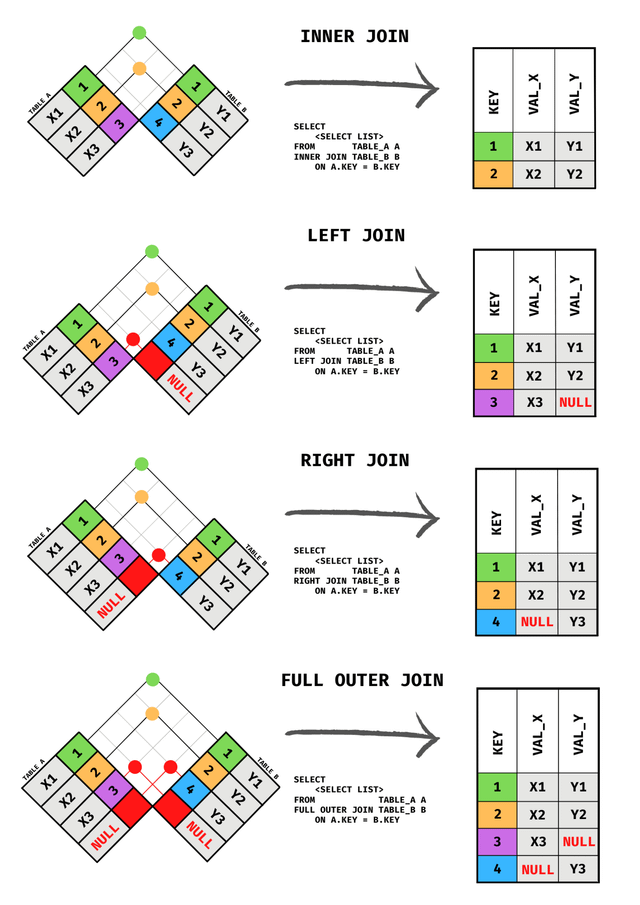!

### INNER JOIN
An **INNER JOIN** returns only the rows where there is a match in both tables. This is useful when you want to combine data from two DataFrames based on a common key.

In [55]:
# Perform an INNER JOIN between Customers and Orders
inner_join_df = pd.merge(customers_df, orders_df, on='CustomerID', how='inner')

# Display the result
inner_join_df

,CustomerID,CustomerName,Country,OrderID,OrderDate,Amount
0,1,Alice,USA,1,2024-01-15,150.0
1,1,Alice,USA,2,2024-02-10,200.0
2,2,Bob,Canada,3,2024-01-20,300.0
3,3,Charlie,UK,4,2024-03-05,250.0
4,4,Diana,Germany,5,2024-03-10,175.0


The inner join returns rows where the CustomerID exists in both the Customers and Orders tables. Customers without orders are excluded.

#### **SQL Query**: 
Retrieve customer names and order amounts where there is a match between customers and orders.

In [56]:
# SQL INNER JOIN query
inner_join_query = '''
SELECT Customer.CustomerName, OrdersPlaced.OrderDate, OrdersPlaced.Amount
FROM Customer
INNER JOIN OrdersPlaced ON Customer.CustomerID = OrdersPlaced.CustomerID;
'''

# Execute the query in Pandas
inner_join_df = pd.read_sql_query(inner_join_query, connection)

# Display the result
inner_join_df

,CustomerName,OrderDate,Amount
0,Alice,2024-01-15,150.0
1,Alice,2024-02-10,200.0
2,Bob,2024-01-20,300.0
3,Charlie,2024-03-05,250.0
4,Diana,2024-03-10,175.0


### LEFT JOIN
A **LEFT JOIN** returns all rows from the left table (in this case, `Customers`), and the matched rows from the right table (e.g., `Orders`). Non-matching rows from the right table will have `NULL` values.

#### **SQL Query**: 
Retrieve all customer names, including those who haven't made any orders.

In [61]:
# SQL LEFT JOIN query
left_join_query = '''
SELECT Customer.CustomerName, OrdersPlaced.OrderDate, OrdersPlaced.Amount
FROM Customer
LEFT JOIN OrdersPlaced ON Customer.CustomerID = OrdersPlaced.CustomerID;
'''

# Execute the query in Pandas
left_join_df = pd.read_sql_query(left_join_query, connection)

# Display the result
left_join_df

,CustomerName,OrderDate,Amount
0,Alice,2024-01-15,150.0
1,Alice,2024-02-10,200.0
2,Bob,2024-01-20,300.0
3,Charlie,2024-03-05,250.0
4,Diana,2024-03-10,175.0


This query returns all customers, even those without any orders. If a customer has no matching order, the OrderDate and Amount will be NULL.

### RIGHT JOIN
A **RIGHT JOIN** returns all rows from the right table (in this case, `Orders`), and the matched rows from the left table (e.g., `Customers`). In SQLite, you can't directly perform a right join, but you can achieve the same result by swapping the table order.

#### SQL Query (Simulated RIGHT JOIN):
Retrieve all orders, including those that don't have matching customers.

In [62]:
# SQL RIGHT JOIN query (simulated in SQLite by reversing LEFT JOIN)
right_join_query = '''
SELECT OrdersPlaced.OrderID, OrdersPlaced.OrderDate, OrdersPlaced.Amount, Customer.CustomerName
FROM OrdersPlaced
LEFT JOIN Customer ON OrdersPlaced.CustomerID = Customer.CustomerID;
'''

# Execute the query in Pandas
right_join_df = pd.read_sql_query(right_join_query, connection)

# Display the result
right_join_df

,OrderID,OrderDate,Amount,CustomerName
0,1,2024-01-15,150.0,Alice
1,2,2024-02-10,200.0,Alice
2,3,2024-01-20,300.0,Bob
3,4,2024-03-05,250.0,Charlie
4,5,2024-03-10,175.0,Diana


### OUTER JOIN 
An **OUTER JOIN** returns all rows when there is a match in either table. Like `RIGHT JOIN`, SQLite doesn’t support `FULL OUTER JOIN`, but we can simulate it by combining `LEFT JOIN` and `RIGHT JOIN` using a `UNION`.

#### SQL Query (Simulated OUTER JOIN):
Retrieve all customers and all orders, including those that don’t have matches in either table.

In [63]:
# SQL FULL OUTER JOIN query (simulated with UNION)
outer_join_query = '''
SELECT Customer.CustomerName, OrdersPlaced.OrderDate, OrdersPlaced.Amount
FROM Customer
LEFT JOIN OrdersPlaced ON Customer.CustomerID = OrdersPlaced.CustomerID
UNION
SELECT Customer.CustomerName, OrdersPlaced.OrderDate, OrdersPlaced.Amount
FROM OrdersPlaced
LEFT JOIN Customer ON OrdersPlaced.CustomerID = Customer.CustomerID;
'''
# Execute the query in Pandas
outer_join_df = pd.read_sql_query(outer_join_query, connection)

# Display the result
outer_join_df

,CustomerName,OrderDate,Amount
0,Alice,2024-01-15,150.0
1,Alice,2024-02-10,200.0
2,Bob,2024-01-20,300.0
3,Charlie,2024-03-05,250.0
4,Diana,2024-03-10,175.0


### What is PyMongo?

**PyMongo** is a Python library that allows developers to interact with MongoDB, a popular NoSQL database, using Python. It provides a way to perform various database operations like inserting, querying, updating, and deleting documents from MongoDB, all through Python code.

#### Key Features of PyMongo:
- **Connection Management**: PyMongo makes it easy to establish and manage connections to a MongoDB instance (either local or cloud-based).
- **CRUD Operations**: It supports all the basic CRUD operations (Create, Read, Update, Delete) on MongoDB collections.
- **Rich Query Language**: PyMongo allows the use of MongoDB's rich query language to filter, project, and aggregate data.
- **Support for MongoDB Data Types**: PyMongo supports MongoDB's BSON (Binary JSON) data types, including special types like `ObjectId` and `Date`.
- **Indexing and Aggregation**: You can create indexes and use MongoDB's aggregation framework through PyMongo.

#### How PyMongo Works:
- PyMongo connects your Python code to a MongoDB instance (whether local or cloud-hosted like MongoDB Atlas).
- It allows you to execute MongoDB queries, similar to how you’d use SQL with relational databases.

#### Use Cases:
- **Web applications**: PyMongo is often used in backend applications to store user data, session data, etc.
- **Data Science**: MongoDB can store large amounts of unstructured data, making PyMongo useful for data retrieval in machine learning and data science projects.
- **Real-time Applications**: With PyMongo, you can handle high-velocity data in real-time systems.

In [2]:
!pip install "pymongo[srv]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 22.0 MB/s eta 0:00:00


In [31]:
import pymongo

In [32]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
uri = "" #Insert your URI here
# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))
# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [33]:
# List the databases in MongoDB Atlas
print("Databases:", client.list_database_names())

Databases: ['sample_mflix', 'admin', 'local']


In [34]:
# Access the database and collection
db = client["sample_mflix"]
collection = db["movies"]

In [38]:
for movie in collection.find({"directors": "Edwin S. Porter"}):
    print(movie)

{'_id': ObjectId('573a1390f29313caabcd42e8'), 'plot': 'A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.', 'genres': ['Short', 'Western'], 'runtime': 11, 'cast': ['A.C. Abadie', "Gilbert M. 'Broncho Billy' Anderson", 'George Barnes', 'Justus D. Barnes'], 'poster': 'https://m.media-amazon.com/images/M/MV5BMTU3NjE5NzYtYTYyNS00MDVmLWIwYjgtMmYwYWIxZDYyNzU2XkEyXkFqcGdeQXVyNzQzNzQxNzI@._V1_SY1000_SX677_AL_.jpg', 'title': 'The Great Train Robbery', 'fullplot': "Among the earliest existing films in American cinema - notable as the first film that presented a narrative story to tell - it depicts a group of cowboy outlaws who hold up a train and rob the passengers. They are then pursued by a Sheriff's posse. Several scenes have color included - all hand tinted.", 'languages': ['English'], 'released': datetime.datetime(1903, 12, 1, 0, 0), 'directors': ['Edwin S. Porter'], 'rated': 'TV-G', 'awards': {'wins': 1, 'nominations': 0, 'text': '1 win.'},

In [39]:
# Query MongoDB
query1 = collection.find({"directors": "Edwin S. Porter"})

# Convert the cursor to a list of dictionaries
movies_directed = list(query1)

# Convert to a Pandas DataFrame
df_directed = pd.DataFrame(movies_directed)

# Display the DataFrame
df_directed.head()

,_id,plot,genres,runtime,cast,poster,title,fullplot,languages,released,directors,rated,awards,lastupdated,year,imdb,countries,type,tomatoes,num_mflix_comments
0,573a1390f29313caabcd42e8,A group of bandits stage a brazen train hold-u...,"[Short, Western]",11,"[A.C. Abadie, Gilbert M. 'Broncho Billy' Ander...",https://m.media-amazon.com/images/M/MV5BMTU3Nj...,The Great Train Robbery,Among the earliest existing films in American ...,[English],1903-12-01,[Edwin S. Porter],TV-G,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-13 00:27:59.177000000,1903,"{'rating': 7.4, 'votes': 9847, 'id': 439}",[USA],movie,"{'viewer': {'rating': 3.7, 'numReviews': 2559,...",0


In [40]:
for movie in collection.find({"year": {"$lt": 1950}}):
    print(movie)

{'_id': ObjectId('573a1390f29313caabcd42e8'), 'plot': 'A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.', 'genres': ['Short', 'Western'], 'runtime': 11, 'cast': ['A.C. Abadie', "Gilbert M. 'Broncho Billy' Anderson", 'George Barnes', 'Justus D. Barnes'], 'poster': 'https://m.media-amazon.com/images/M/MV5BMTU3NjE5NzYtYTYyNS00MDVmLWIwYjgtMmYwYWIxZDYyNzU2XkEyXkFqcGdeQXVyNzQzNzQxNzI@._V1_SY1000_SX677_AL_.jpg', 'title': 'The Great Train Robbery', 'fullplot': "Among the earliest existing films in American cinema - notable as the first film that presented a narrative story to tell - it depicts a group of cowboy outlaws who hold up a train and rob the passengers. They are then pursued by a Sheriff's posse. Several scenes have color included - all hand tinted.", 'languages': ['English'], 'released': datetime.datetime(1903, 12, 1, 0, 0), 'directors': ['Edwin S. Porter'], 'rated': 'TV-G', 'awards': {'wins': 1, 'nominations': 0, 'text': '1 win.'},

In [41]:
# Query MongoDB
query2 = collection.find({"year": {"$lt": 1950}})

# Convert the cursor to a list of dictionaries
movies_before_1910 = list(query2)

# Convert to a Pandas DataFrame
df_before_1910 = pd.DataFrame(movies_before_1910)

# Display the DataFrame
df_before_1910.head()

,_id,plot,genres,runtime,cast,poster,title,fullplot,languages,released,...,awards,lastupdated,year,imdb,countries,type,tomatoes,num_mflix_comments,writers,metacritic
0,573a1390f29313caabcd42e8,A group of bandits stage a brazen train hold-u...,"[Short, Western]",11,"[A.C. Abadie, Gilbert M. 'Broncho Billy' Ander...",https://m.media-amazon.com/images/M/MV5BMTU3Nj...,The Great Train Robbery,Among the earliest existing films in American ...,[English],1903-12-01,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-13 00:27:59.177000000,1903,"{'rating': 7.4, 'votes': 9847, 'id': 439}",[USA],movie,"{'viewer': {'rating': 3.7, 'numReviews': 2559,...",0,NaN,NaN
1,573a1390f29313caabcd446f,"A greedy tycoon decides, on a whim, to corner ...","[Short, Drama]",14,"[Frank Powell, Grace Henderson, James Kirkwood...",NaN,A Corner in Wheat,"A greedy tycoon decides, on a whim, to corner ...",[English],1909-12-13,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-13 00:46:30.660000000,1909,"{'rating': 6.6, 'votes': 1375, 'id': 832}",[USA],movie,"{'viewer': {'rating': 3.6, 'numReviews': 109, ...",1,NaN,NaN
2,573a1390f29313caabcd4803,"Cartoon figures announce, via comic strip ball...","[Animation, Short, Comedy]",7,[Winsor McCay],https://m.media-amazon.com/images/M/MV5BYzg2Nj...,"Winsor McCay, the Famous Cartoonist of the N.Y...",Cartoonist Winsor McCay agrees to create a lar...,[English],1911-04-08,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-29 01:09:03.030000000,1911,"{'rating': 7.3, 'votes': 1034, 'id': 1737}",[USA],movie,"{'viewer': {'rating': 3.4, 'numReviews': 89, '...",0,"[Winsor McCay (comic strip ""Little Nemo in Slu...",NaN
3,573a1390f29313caabcd4eaf,"A woman, with the aid of her police officer sw...","[Crime, Drama]",88,"[Jane Gail, Ethel Grandin, William H. Turner, ...",https://m.media-amazon.com/images/M/MV5BYzk0YW...,Traffic in Souls,NaN,[English],1913-11-24,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-09-15 02:07:14.247000000,1913,"{'rating': 6.0, 'votes': 371, 'id': 3471}",[USA],movie,"{'viewer': {'rating': 3.0, 'numReviews': 85, '...",1,NaN,NaN
4,573a1390f29313caabcd50e5,"The cartoonist, Winsor McCay, brings the Dinos...","[Animation, Short, Comedy]",12,"[Winsor McCay, George McManus, Roy L. McCardell]",https://m.media-amazon.com/images/M/MV5BMTQxNz...,Gertie the Dinosaur,Winsor Z. McCay bets another cartoonist that h...,[English],1914-09-15,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-18 01:03:15.313000000,1914,"{'rating': 7.3, 'votes': 1837, 'id': 4008}",[USA],movie,"{'viewer': {'rating': 3.7, 'numReviews': 29}, ...",0,[Winsor McCay],NaN


In [42]:
for movie in collection.find({"imdb.rating": {"$gt": 7}}):
    print(movie)

{'_id': ObjectId('573a1390f29313caabcd42e8'), 'plot': 'A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.', 'genres': ['Short', 'Western'], 'runtime': 11, 'cast': ['A.C. Abadie', "Gilbert M. 'Broncho Billy' Anderson", 'George Barnes', 'Justus D. Barnes'], 'poster': 'https://m.media-amazon.com/images/M/MV5BMTU3NjE5NzYtYTYyNS00MDVmLWIwYjgtMmYwYWIxZDYyNzU2XkEyXkFqcGdeQXVyNzQzNzQxNzI@._V1_SY1000_SX677_AL_.jpg', 'title': 'The Great Train Robbery', 'fullplot': "Among the earliest existing films in American cinema - notable as the first film that presented a narrative story to tell - it depicts a group of cowboy outlaws who hold up a train and rob the passengers. They are then pursued by a Sheriff's posse. Several scenes have color included - all hand tinted.", 'languages': ['English'], 'released': datetime.datetime(1903, 12, 1, 0, 0), 'directors': ['Edwin S. Porter'], 'rated': 'TV-G', 'awards': {'wins': 1, 'nominations': 0, 'text': '1 win.'},

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [43]:
# Query MongoDB
query3 = collection.find({"imdb.rating": {"$gt": 7}})

# Convert the cursor to a list of dictionaries
movies_high_rating = list(query3)

# Convert to a Pandas DataFrame
df_high_rating = pd.DataFrame(movies_high_rating)

# Display the DataFrame
df_high_rating.head()

,_id,plot,genres,runtime,cast,poster,title,fullplot,languages,released,...,awards,lastupdated,year,imdb,countries,type,tomatoes,num_mflix_comments,writers,metacritic
0,573a1390f29313caabcd42e8,A group of bandits stage a brazen train hold-u...,"[Short, Western]",11.0,"[A.C. Abadie, Gilbert M. 'Broncho Billy' Ander...",https://m.media-amazon.com/images/M/MV5BMTU3Nj...,The Great Train Robbery,Among the earliest existing films in American ...,[English],1903-12-01,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-13 00:27:59.177000000,1903,"{'rating': 7.4, 'votes': 9847, 'id': 439}",[USA],movie,"{'viewer': {'rating': 3.7, 'numReviews': 2559,...",0.0,NaN,NaN
1,573a1390f29313caabcd4803,"Cartoon figures announce, via comic strip ball...","[Animation, Short, Comedy]",7.0,[Winsor McCay],https://m.media-amazon.com/images/M/MV5BYzg2Nj...,"Winsor McCay, the Famous Cartoonist of the N.Y...",Cartoonist Winsor McCay agrees to create a lar...,[English],1911-04-08,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-29 01:09:03.030000000,1911,"{'rating': 7.3, 'votes': 1034, 'id': 1737}",[USA],movie,"{'viewer': {'rating': 3.4, 'numReviews': 89, '...",0.0,"[Winsor McCay (comic strip ""Little Nemo in Slu...",NaN
2,573a1390f29313caabcd50e5,"The cartoonist, Winsor McCay, brings the Dinos...","[Animation, Short, Comedy]",12.0,"[Winsor McCay, George McManus, Roy L. McCardell]",https://m.media-amazon.com/images/M/MV5BMTQxNz...,Gertie the Dinosaur,Winsor Z. McCay bets another cartoonist that h...,[English],1914-09-15,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-08-18 01:03:15.313000000,1914,"{'rating': 7.3, 'votes': 1837, 'id': 4008}",[USA],movie,"{'viewer': {'rating': 3.7, 'numReviews': 29}, ...",0.0,[Winsor McCay],NaN
3,573a1390f29313caabcd5293,Young Pauline is left a lot of money when her ...,[Action],199.0,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",https://m.media-amazon.com/images/M/MV5BMzgxOD...,The Perils of Pauline,Young Pauline is left a lot of money when her ...,[English],1914-03-23,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-09-12 00:01:18.647000000,1914,"{'rating': 7.6, 'votes': 744, 'id': 4465}",[USA],movie,"{'viewer': {'rating': 2.8, 'numReviews': 9}, '...",0.0,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN
4,573a1391f29313caabcd6e2a,A newly wedded couple attempt to build a house...,"[Short, Comedy]",25.0,"[Buster Keaton, Sybil Seely]",NaN,One Week,Buster and Sybil exit a chapel as newlyweds. A...,[English],1920-09-01,...,"{'wins': 1, 'nominations': 0, 'text': '1 win.'}",2015-05-07 01:07:01.633000000,1920,"{'rating': 8.3, 'votes': 3942, 'id': 11541}",[USA],movie,"{'viewer': {'rating': 4.3, 'numReviews': 752, ...",0.0,NaN,NaN


In [44]:
new_movie = {
    "title": "New Movie Title",
    "year": 2024,
    "genres": ["Action", "Adventure"],
    "directors": ["New Director"],
    "plot": "An exciting new plot.",
    "languages": ["English"],
    "imdb": {
        "rating": 8.2,
        "votes": 10000,
        "id": 123456
    }
}

# Insert the new movie
insert_result = collection.insert_one(new_movie)

# Verify the insertion by printing the inserted ID
print("Inserted movie with ID:", insert_result.inserted_id)

Inserted movie with ID: 67028b30feeed26d87edbfd8


In [45]:
# Query the inserted movie by its title
inserted_movie = collection.find_one({"title": "New Movie Title"})

# Display the inserted movie
print(inserted_movie)

{'_id': ObjectId('670285c7feeed26d87edbfd5'), 'title': 'New Movie Title', 'year': 2024, 'genres': ['Action', 'Adventure'], 'directors': ['New Director'], 'plot': 'An exciting new plot.', 'languages': ['English'], 'imdb': {'rating': 8.2, 'votes': 10000, 'id': 123456}}


In [46]:
# Convert the document to a DataFrame
df_inserted_movie = pd.DataFrame([inserted_movie])

# Display the DataFrame
df_inserted_movie.head()

,_id,title,year,genres,directors,plot,languages,imdb
0,670285c7feeed26d87edbfd5,New Movie Title,2024,"[Action, Adventure]",[New Director],An exciting new plot.,[English],"{'rating': 8.2, 'votes': 10000, 'id': 123456}"


In [29]:
from bson import ObjectId

# Define the ObjectId for the movie to delete
movie_id = "573a1390f29313caabcd516c"

# Delete the movie by its _id
delete_result = collection.delete_one({"_id": ObjectId(movie_id)})

# Verify if the deletion was successful
if delete_result.deleted_count > 0:
    print(f"Movie with ID {movie_id} deleted successfully.")
else:
    print(f"No movie found with ID {movie_id}.")

Movie with ID 573a1390f29313caabcd516c deleted successfully.


In [30]:
# Try to find the movie by its _id to verify deletion
deleted_movie = collection.find_one({"_id": ObjectId(movie_id)})

# Verify if the movie still exists
if deleted_movie is None:
    print(f"Movie with ID {movie_id} has been successfully deleted.")
else:
    print("Movie still exists:", deleted_movie)

Movie with ID 573a1390f29313caabcd516c has been successfully deleted.


# Performance Tuning Tips for SQL and NoSQL Databases

Both SQL and NoSQL databases can become slow if not optimized correctly, especially when handling large amounts of data. Below are performance tuning tips and best practices for both types of databases.

## 1. SQL Performance Tuning Tips (Relational Databases)

### A. Use Indexes for Faster Querying

Think of an index as a table of contents in a book. It helps you quickly locate the information you're searching for without having to go through every page. Indexes are used to speed up the retrieval of data from tables. By creating indexes on frequently searched columns (e.g., `WHERE`, `JOIN` conditions), SQL databases can avoid scanning the entire table for each query. But, avoid over-indexing as it can slow down INSERT, UPDATE, and DELETE operations since each change needs to update the index.

- **Example**:
  
  ```sql
  CREATE INDEX idx_customer_name ON customers (customer_name);

### B. Optimize SQL Queries

Writing a clean and efficient query is like giving clear and direct instructions. If you’re vague or indirect, it takes longer for the database to find the answer. SQL queries should avoid unnecessary operations like `SELECT *` (selecting all columns) and should instead select only the columns needed. Proper use of `JOIN`, `WHERE`, and `LIMIT` clauses can also make queries more efficient.

- **Avoid**:
  
  ```sql
  SELECT * FROM customers;

- **Instead, use**:

    ```sql
    SELECT customer_name, city 
    FROM customers 
    WHERE city = 'New York';



### C. Partition Large Tables

Breaking a large table into smaller chunks makes it easier to manage and search through the data, just like splitting up a long book into multiple volumes. Table partitioning involves splitting large tables into smaller, more manageable pieces based on ranges (e.g., dates or IDs). This reduces the amount of data scanned for queries, especially in very large datasets.

- **Example**: A table of transactions can be partitioned by year.

  ```sql
  CREATE TABLE transactions_2023 
  PARTITION OF transactions 
  FOR VALUES IN (2023);

## 2. NoSQL Performance Tuning Tips (Non-Relational Databases)

### A. Use Appropriate Data Models

- In NoSQL, how you organize data matters. Think of your data as boxes in a warehouse. The better organized they are, the faster you can find what you need. NoSQL databases (e.g., MongoDB, Cassandra) are schema-less, but that doesn't mean the structure isn’t important. Choose the right data model for your use case:
  - **Document-based** (e.g., MongoDB): Stores data in JSON-like documents.
  - **Key-Value** (e.g., Redis): Great for storing and retrieving simple key-value pairs quickly.
  - **Column-based** (e.g., Cassandra): Efficient for storing and querying large amounts of data.

- **Best Practice**: Optimize the data model for the most frequent access patterns. Store related data together in one document if it is frequently accessed together.

### B. Indexing in NoSQL

Just like in SQL, indexes in NoSQL help you find data faster, like a well-organized card catalog in a library. Indexing in NoSQL databases like MongoDB can improve the performance of read operations, but they come with a cost in write performance. Use indexes on fields that are frequently queried but avoid too many indexes as it can slow down insertions and updates.

- **Example**:

  ```javascript
  db.collection.createIndex({ customer_name: 1 });

### C. Sharding for Horizontal Scalability

Sharding is like splitting a very large database into smaller, easier-to-manage pieces spread across multiple servers. Sharding distributes data across multiple machines to handle high loads and large datasets. Each shard contains a portion of the database. This is especially useful when you need to scale out rather than scaling vertically (i.e., upgrading to a more powerful machine). Choose a good shard key to ensure even data distribution.

### D. Caching

Caching is like storing a copy of your favorite TV show so you don’t have to stream it every time. It saves time by preventing repeated work. In NoSQL databases, frequently requested data can be cached using systems like Redis or Memcached. This reduces the load on your database and speeds up data retrieval. Cache data that is frequently read but rarely updated to avoid stale data.

### Lastly, don’t ask for more than you need!

Fetch only the required data in your queries to speed up response times. Use `LIMIT` in SQL or pagination in NoSQL to avoid fetching large datasets unnecessarily. 

- For **SQL databases**, focus on proper indexing, query optimization, and partitioning to ensure efficiency.
- For **NoSQL databases**, concentrate on data modeling, indexing, sharding, and caching for scalable and efficient performance.

Both types of databases benefit from practices like monitoring performance, using connection pooling, and archiving older data.

By following these tips and best practices, you can ensure that your SQL and NoSQL databases run efficiently, even at scale!